#### Regressão Logística

A regressão logística é uma técnica que tem como objetivo produzir um modelo que permite predições de uma variável categórica, geralmente binária em função de uma ou mais variáveis independentes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

A base de dados Eleicao, conta com dados dos candidatos de uma eleição, a coluna `SITUACAO` diz se o candidato foi eleito ou não e a coluna `DESPESAS` o total de investimento que esse candidato teve com a campanha, logo ela relaciona o quanto um candidato gastou em sua campanha com o fato de ter sido eleito ou não.

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


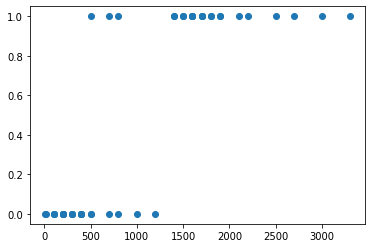

In [2]:
dataset = pd.read_csv("data/Eleicao.csv", sep=";")
plt.scatter(dataset.DESPESAS, dataset.SITUACAO)
dataset.describe()

O método describe da a da média e da distribuição dos dados, também há uma contagem de entradas, no caso são 47 entradas.

In [3]:
np.corrcoef(dataset.DESPESAS, dataset.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

Pelo coeficiente de correlação, dá pra perceber que há uma correlação positiva e forte das despesas com situação.

Para realizar a regreção logística, primeiro é necessário separar os dados que no caso a variável independente será as despesas, que consta na coluna de índice 2 do dataset e para a variável dependente, será usado a situação que corresponde à coluna com índice 1. É necessário também transformar os dados da variável x em um array de 2 dimensões para ser utilizada no modelo.

In [4]:
x = dataset.iloc[:, 2].values
x = x[:, np.newaxis]
y = dataset.iloc[:, 1].values

Após a transformação dos dados, é criado o modelo.

In [5]:
modelo = LogisticRegression().fit(x, y)
print(f"Coeficiente Angular: {modelo.coef_}\nInterseção com eixo Y: {modelo.intercept_}")

Coeficiente Angular: [[0.00498364]]
Interseção com eixo Y: [-4.60287217]


Para visualizar esse gráfico, primeiro é necessário fazer algumas transformações, uma delas é utilizar a função sigmóide. É uma função com o gráfico em forma de S que é muito utilizada no ramo da economia e computação. É definida como $$f(x) = \frac{1}{1 + e^{-x}}$$

Essa função retorna a probabilidade do êxito do valor a ser previsto, logo o resultado aplicando essa função a um valor de orçamento utilizado para a campanha, retorna a probabilidade desse candidato ter sido eleito.

Para criar a representação da função sigmóide, primeiro é necessário gerar os dados do eixo X, para isso é possível usar o método `linspace` da biblioteca `numpy` que cria um array de número com uma quantidade de entradas específicadas em um intervalo, nesse caso é criado um array de 100 número variando igualmente entre 10 e 3000.

A função model é a função sigmóide propriamente dita. Depois de criada é gerado os gráficos, da função sigmóide em vermelho. Em verde está uma função degrau, como se fosse considerado uma mudança abrupta entre os dados de não eleito e eleito, o que não acontece no mundo real.


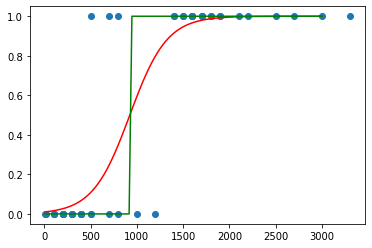

In [6]:
# Scatterplot dos dados
plt.scatter(x, y)

# Preparando a variável X
x_teste = np.linspace(10, 3000, 100)

# Função sigmóide
def model(x):
    return 1 / (1 + np.exp(-x))

# Plot dos gráficos
plt.plot(x_teste, model(x_teste * modelo.coef_ + modelo.intercept_).ravel(), color="red")
plt.plot(x_teste, modelo.predict(x_teste.reshape(-1, 1)), color="green")

Para realizar as previsões, é necessário carregar os dados a serem previstos, que estão armazenados no dataset NovosCandidatos

In [7]:
previsoes = pd.read_csv("data/NovosCandidatos.csv", sep=";")
previsoes.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


As previsões são feitas com o método `predict`

In [8]:
despesas = previsoes.iloc[:, 1].values.reshape(-1, 1)
resultado = modelo.predict(despesas)
np.column_stack((previsoes, resultado))

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)

O resultado é das previsões é colocado lado a lado com o orçamento da campanha. É possível observar de acordo com o orçamento da campanha qual candidato poderá ser eleito ou não.